In [1]:
import datetime

import pymc
import numpy as np
import spacepy.plot as spp # for the style
import matplotlib.pyplot as plt
import spacepy.toolbox as tb
import spacepy.plot as spp
%matplotlib inline

datetime.datetime.now()

This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


datetime.datetime(2016, 9, 20, 12, 22, 44, 257707)

What we are going for here is recovering apower law from a set of channels that will become more realistic as we move down the notebook.


### Data
The data form a powerlaw from 50keV to 5MeV with power law index of -2.5.

In [26]:
def get_data(x, mag=100, pl=-2.5, xmin=50.0):
    C = (-pl - 1)*xmin**(-pl-1)
    return mag/0.03*C*x**(pl)
    
get_data(50)    


100.0

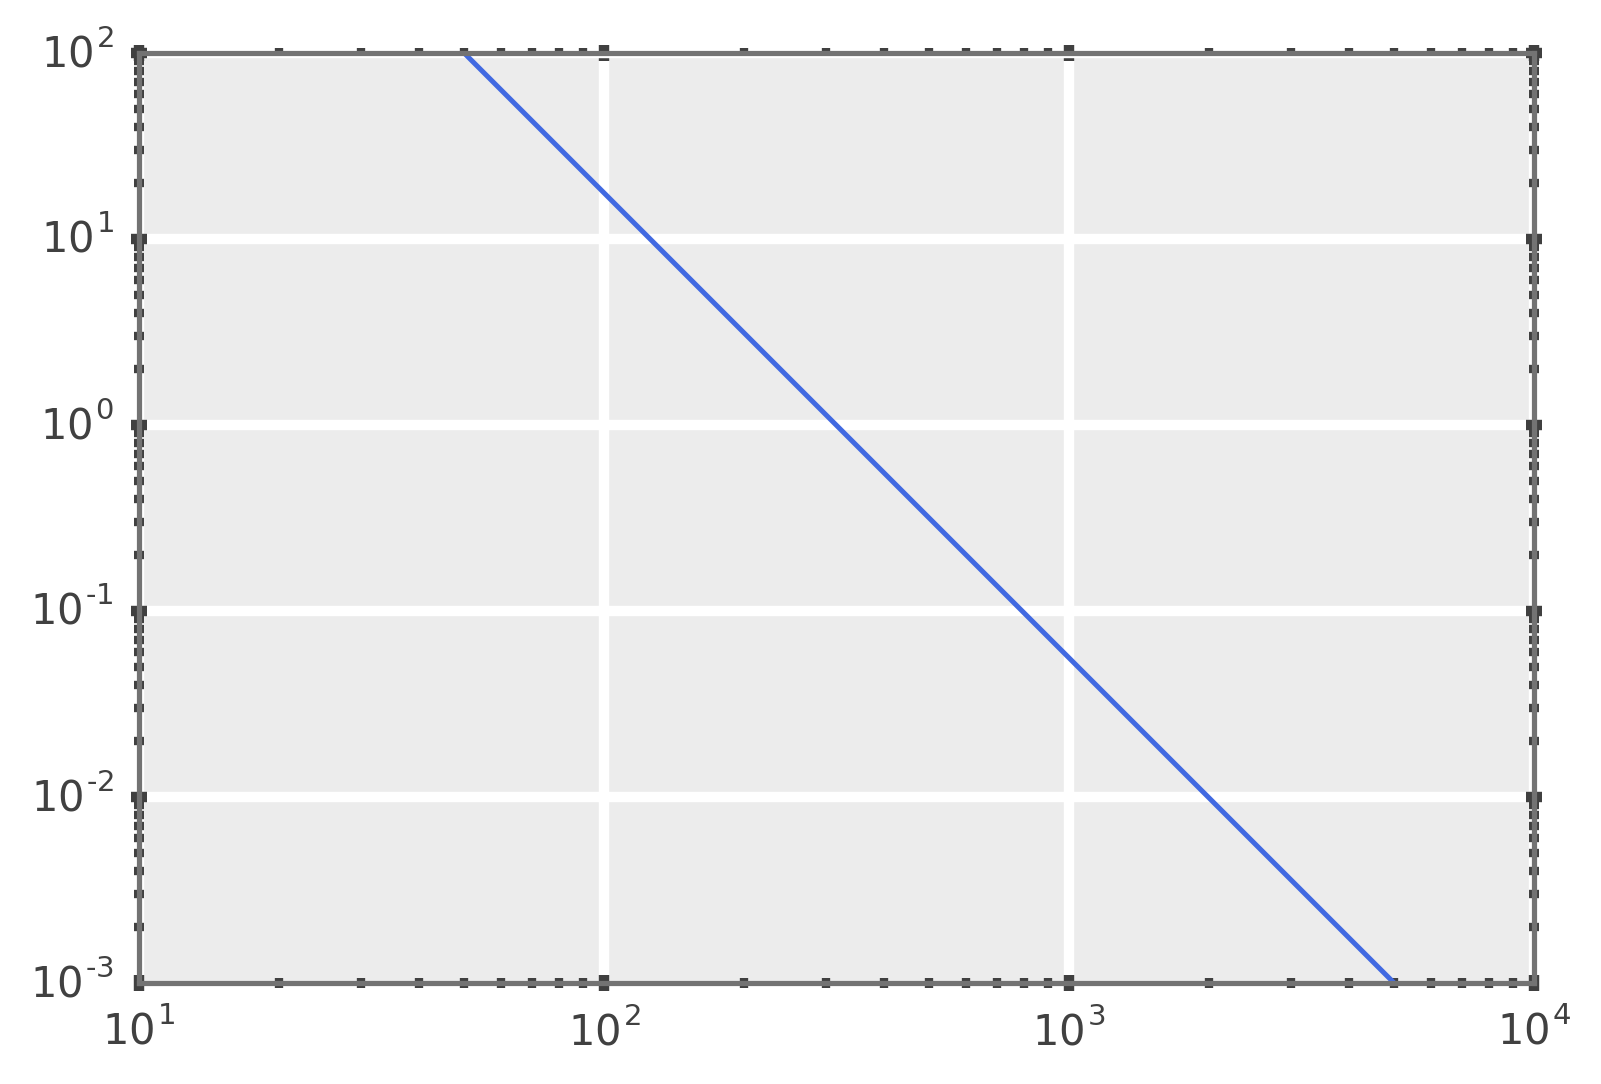

In [28]:
50**-2.5
100**(-1/2.5) * 50**-2.5
pl = -2.5
xmin = 50
C = (-pl - 1)*xmin**(-pl-1)
get_data(50)
plt.loglog(tb.logspace(50, 5000, 10), get_data(tb.logspace(50, 5000, 10)))

### 100% efficiency integral channels

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

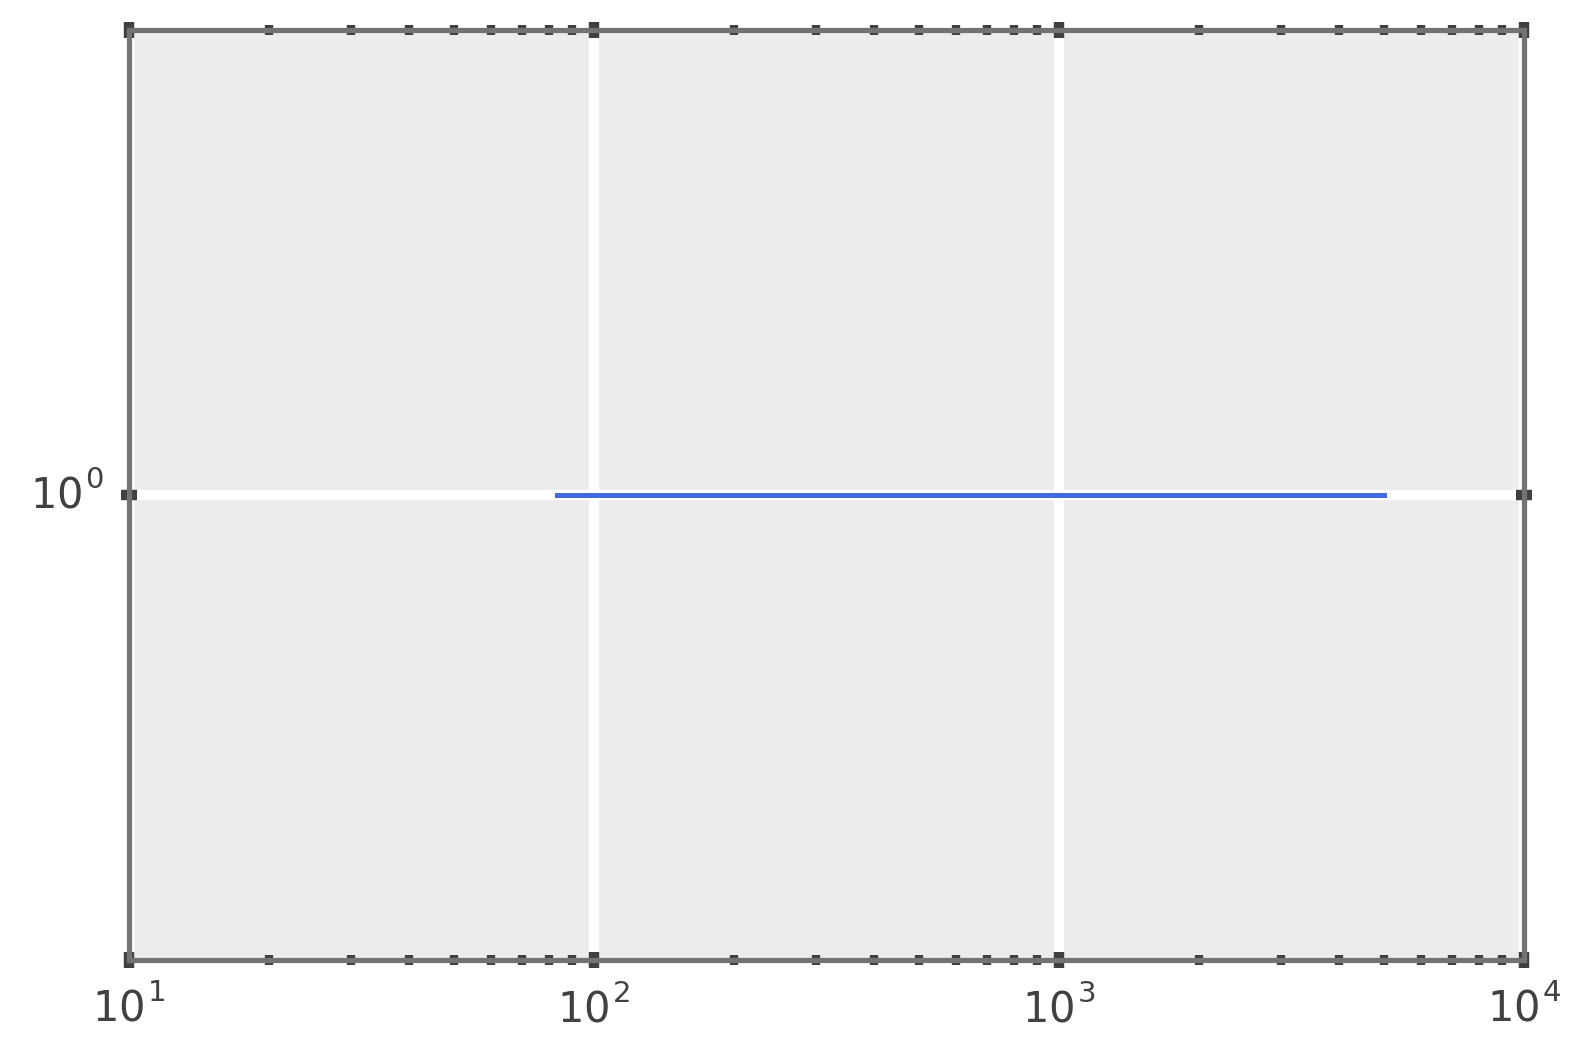

In [37]:
def integral_channel(x, cutoff, mag=1.0):
    ans = np.ones_like(x)
    ans.fill(mag)
    ind = (x < cutoff)
    ans[ind] = 0
    return ans

plt.loglog(tb.logspace(50, 5000, 10), integral_channel(tb.logspace(50, 5000, 10), 60))
integral_channel(tb.logspace(50, 5000, 10), 60)

(500,) (500, 18)


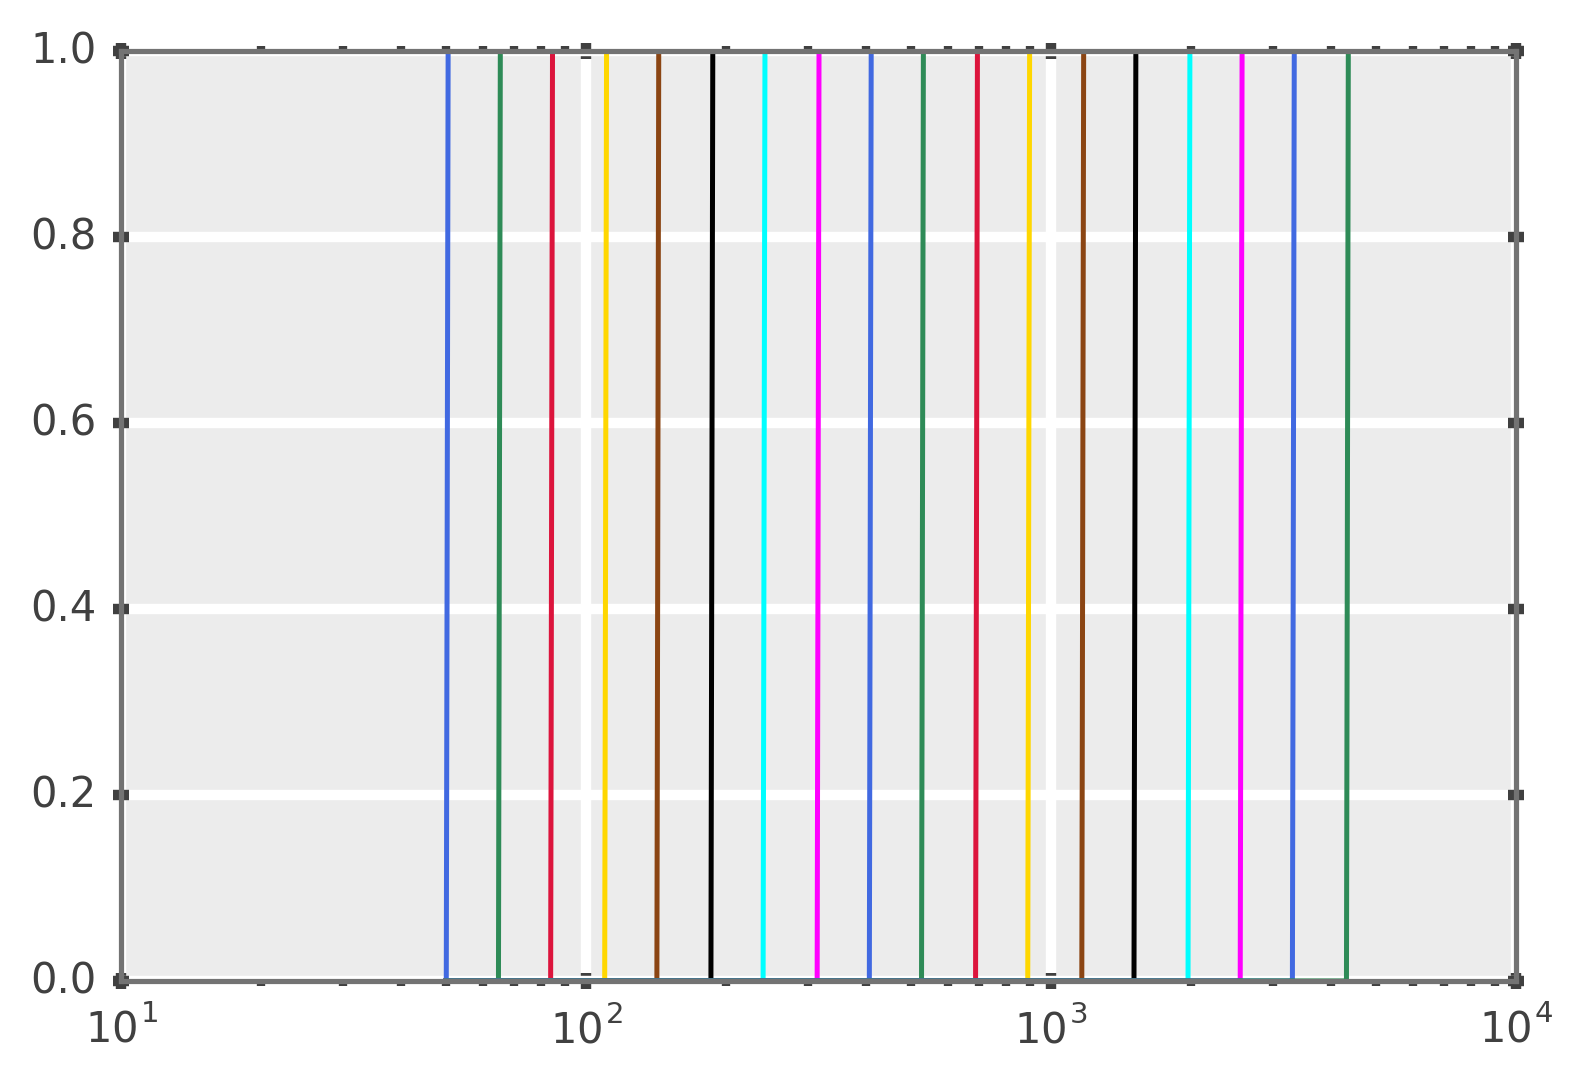

In [61]:
def de_e_channels(de=30, xmin=50, xmax=5000, npts=500):
    ans = []
    co = xmin
    xval = tb.logspace(xmin, xmax, npts)
    while co < xmax:
#         print('co', co)
        ans.append(integral_channel(xval, co))
#         print(de/100 * co, de)
        co += (de/100 * co)
    return xval, np.asarray(ans).T

x, y = de_e_channels()
plt.semilogx(x, y)
print(x.shape, y.shape)
# print(x, y)

65.0